https://realpython.com/python-nltk-sentiment-analysis/

# Sentimen Analysis - Twitter
## 1. Download NLTK library

In [1]:
import pandas as pd
import numpy as np

In [2]:
!pip install nltk

In [3]:
import nltk

nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

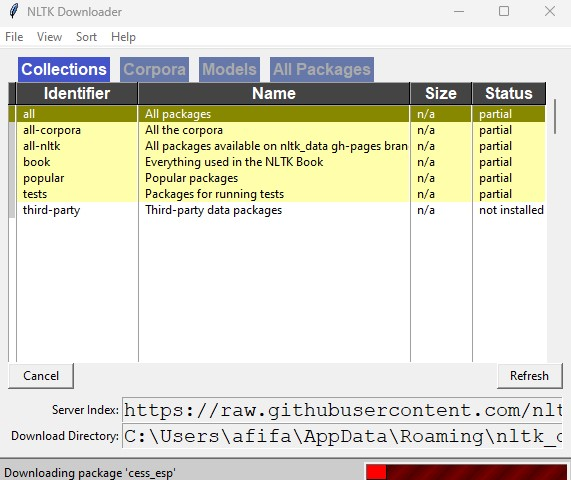

In [4]:
# When run nltk.download(), the downloader will pop up.
from IPython.display import Image
display(Image(filename="D:\Afif\HTC\Screenshot 2023-05-12 065057.jpg"))

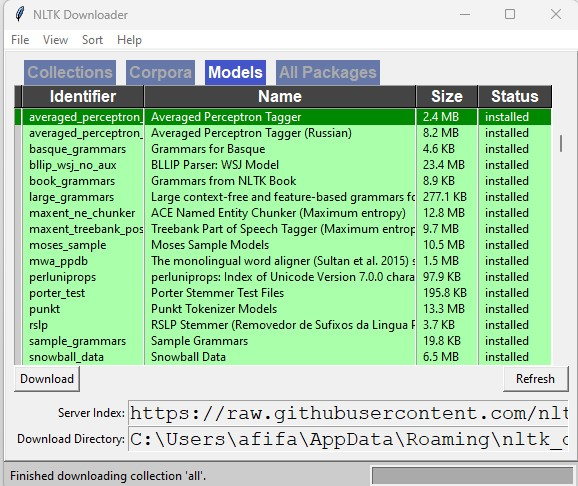

In [5]:
# There are a lot of models that can be used.
display(Image(filename="D:\Afif\HTC\Screenshot 2023-05-12 065730.jpg"))

## 2. Load Tweet

In [6]:
data = pd.read_csv(r"D:\Afif\HTC\drive-download-20230511T014039Z-001\raw_twitter_parti_politik_2022_1_2022_05_21.csv")
data

C:\Users\afifa\AppData\Local\Temp\ipykernel_11044\2815005677.py:1: DtypeWarning: Columns (4,6) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(r"D:\Afif\HTC\drive-download-20230511T014039Z-001\raw_twitter_parti_politik_2022_1_2022_05_21.csv")


,id,user_created_time,user,user_description,user_followers_count,user_profile_location,tweet_geo_loc,tweets,likes,time
0,321255263,Tue Jun 21 08:15:13 +0000 2011,adamchairy,| Cat | Ride | Drive | its not over until i win,376,The Bos Gaurus,NaN,RT @fadzmel: Tiba-tiba dah jadi veteran UMNO? ...,0.0,2022-05-20 15:58:43+00:00
1,217651297,Sat Nov 20 03:24:59 +0000 2010,ajambenuden,Penjahat Skateboards #YNWA #gengjahat,501,Keramat Smart,NaN,RT @BadBoy2662: Parti UMNO sah parti babi. Ker...,0.0,2022-05-20 15:58:17+00:00
2,19079731,Fri Jan 16 18:50:11 +0000 2009,chicarosa,A broken dreamer trying to find her place in s...,489,"Kuala Lumpur, Malaysia",NaN,"RT @esKahn: I assure you, Ultra Kirana isn't t...",0.0,2022-05-20 15:57:55+00:00
3,953619050,Sat Nov 17 13:54:06 +0000 2012,lunadellana,NaN,1063,NaN,NaN,RT @BadBoy2662: Babi tak babi laa Presiden UMN...,0.0,2022-05-20 15:55:21+00:00
4,1600369057,Wed Jul 17 07:23:02 +0000 2013,MalaysiaGazette,Malaysian Mind Sprouting News Portal,126518,Kuala Lumpur,NaN,UMNO dan Pas perlu cari kata putus #malaysiaga...,0.0,2022-05-20 15:55:13+00:00
...,...,...,...,...,...,...,...,...,...,...
71684,832358882,Wed Sep 19 02:22:13 +0000 2012,KucinSuzzy,NaN,139.0,NaN,NaN,RT @hakarim_51: https://t.co/27vo0P5dOZ,0.0,2022-05-12 08:16:49+00:00
71685,784631839717744644,Sat Oct 08 05:49:43 +0000 2016,chshoaibmunir1,A student and well wisher of Nation,268.0,NaN,NaN,RT @RealYasir__Khan: Due to money laundering o...,0.0,2022-05-12 08:15:06+00:00
71686,784631839717744644,Sat Oct 08 05:49:43 +0000 2016,chshoaibmunir1,A student and well wisher of Nation,268.0,NaN,NaN,RT @RealYasir__Khan: None can beat Pmln in inc...,0.0,2022-05-12 08:13:55+00:00
71687,217651297,Sat Nov 20 03:24:59 +0000 2010,ajambenuden,Penjahat Skateboards #YNWA #gengjahat,501.0,Keramat Smart,NaN,RT @KartunisGandum: Abang cadangkan PKR buat d...,0.0,2022-05-12 08:13:43+00:00


In [7]:
# we want to focus on 'tweets' column
data = data[['user','tweets']]
data

,user,tweets
0,adamchairy,RT @fadzmel: Tiba-tiba dah jadi veteran UMNO? ...
1,ajambenuden,RT @BadBoy2662: Parti UMNO sah parti babi. Ker...
2,chicarosa,"RT @esKahn: I assure you, Ultra Kirana isn't t..."
3,lunadellana,RT @BadBoy2662: Babi tak babi laa Presiden UMN...
4,MalaysiaGazette,UMNO dan Pas perlu cari kata putus #malaysiaga...
...,...,...
71684,KucinSuzzy,RT @hakarim_51: https://t.co/27vo0P5dOZ
71685,chshoaibmunir1,RT @RealYasir__Khan: Due to money laundering o...
71686,chshoaibmunir1,RT @RealYasir__Khan: None can beat Pmln in inc...
71687,ajambenuden,RT @KartunisGandum: Abang cadangkan PKR buat d...


In [22]:
# no null value detected
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71689 entries, 0 to 71688
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   user    71689 non-null  object
 1   tweets  71686 non-null  object
dtypes: object(2)
memory usage: 1.1+ MB


## 3. Data Preprocessing
### Translate to English

In [9]:
!pip install deep_translator

In [12]:
from deep_translator import GoogleTranslator
translator = GoogleTranslator(source='auto', target='en')

In [24]:
# I stop the execution after 1.5hours. Because I do not have much time left before submit this assignment.

%%time
tw = []
for i, row in data.iterrows():
    tw.append(translator.translate(row['tweets']))
    
data['tweets_en'] = tw
data

KeyboardInterrupt: 

In [28]:
# about 24k have been translated. So, will proceed with these output.
len(tw)

24711

In [ ]:
data = data.head(24711)

In [32]:
data.shape

(24711, 2)

In [33]:
data['tweets_en'] = tw
data

C:\Users\afifa\AppData\Local\Temp\ipykernel_11044\2750447757.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['tweets_en'] = tw


,user,tweets,tweets_en
0,adamchairy,RT @fadzmel: Tiba-tiba dah jadi veteran UMNO? ...,RT @fadzmel: Have you suddenly become an UMNO ...
1,ajambenuden,RT @BadBoy2662: Parti UMNO sah parti babi. Ker...,RT @BadBoy2662: The UMNO party is a pig party....
2,chicarosa,"RT @esKahn: I assure you, Ultra Kirana isn't t...","RT @esKahn: I assure you, Ultra Kirana isn't t..."
3,lunadellana,RT @BadBoy2662: Babi tak babi laa Presiden UMN...,"RT @BadBoy2662: A pig is not a pig, the Presid..."
4,MalaysiaGazette,UMNO dan Pas perlu cari kata putus #malaysiaga...,UMNO and PAS need to find a final word #malays...
...,...,...,...
24706,DoitorFace,@ranjha001 BilKul usi Traah hansi aati hai jab...,@ranjha001 BilKul usi traah hansi aati hai jab...
24707,mardanhaider_,RT @RealWaqarMaliks: #امپورٹڈ_حکومت_نامنظور\nB...,RT @RealWaqarMaliks: #imported_government_disa...
24708,AbdurahmanWyne,RT @AliKhizar: PKR/USD traded at 200 in interb...,RT @AliKhizar: PKR/USD traded at 200 in interb...
24709,Bikinitopless,RT @partypoker: We have 5 x $16.50 satellite t...,RT @partypoker: We have 5 x $16.50 satellite t...


In [34]:
# will save this dataset first to save the translated tweet into csv for futher usage.
data.to_csv("D:\Afif\HTC\dataset\df_translated_tw.csv")

### remove stopwords, punctuation and links.

In [54]:
data = pd.read_csv(r"D:\Afif\HTC\dataset\df_translated_tw.csv")
data.head()

,Unnamed: 0,user,tweets,tweets_en
0,0,adamchairy,RT @fadzmel: Tiba-tiba dah jadi veteran UMNO? ...,RT @fadzmel: Have you suddenly become an UMNO ...
1,1,ajambenuden,RT @BadBoy2662: Parti UMNO sah parti babi. Ker...,RT @BadBoy2662: The UMNO party is a pig party....
2,2,chicarosa,"RT @esKahn: I assure you, Ultra Kirana isn't t...","RT @esKahn: I assure you, Ultra Kirana isn't t..."
3,3,lunadellana,RT @BadBoy2662: Babi tak babi laa Presiden UMN...,"RT @BadBoy2662: A pig is not a pig, the Presid..."
4,4,MalaysiaGazette,UMNO dan Pas perlu cari kata putus #malaysiaga...,UMNO and PAS need to find a final word #malays...


In [55]:
# convert all to string because found out that the column contains float.
a = []
for i, row in data.iterrows():
    a.append(str(row['tweets_en']))
    
data['tweets_en'] = a

In [56]:
from bs4 import BeautifulSoup

In [57]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()
data['tw_clean1'] = data['tweets_en'].apply(strip_html)
#data=data.drop('Text',axis=1)
data.head()

C:\Users\afifa\anaconda3\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(
C:\Users\afifa\anaconda3\lib\site-packages\bs4\__init__.py:404: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(


,Unnamed: 0,user,tweets,tweets_en,tw_clean1
0,0,adamchairy,RT @fadzmel: Tiba-tiba dah jadi veteran UMNO? ...,RT @fadzmel: Have you suddenly become an UMNO ...,RT @fadzmel: Have you suddenly become an UMNO ...
1,1,ajambenuden,RT @BadBoy2662: Parti UMNO sah parti babi. Ker...,RT @BadBoy2662: The UMNO party is a pig party....,RT @BadBoy2662: The UMNO party is a pig party....
2,2,chicarosa,"RT @esKahn: I assure you, Ultra Kirana isn't t...","RT @esKahn: I assure you, Ultra Kirana isn't t...","RT @esKahn: I assure you, Ultra Kirana isn't t..."
3,3,lunadellana,RT @BadBoy2662: Babi tak babi laa Presiden UMN...,"RT @BadBoy2662: A pig is not a pig, the Presid...","RT @BadBoy2662: A pig is not a pig, the Presid..."
4,4,MalaysiaGazette,UMNO dan Pas perlu cari kata putus #malaysiaga...,UMNO and PAS need to find a final word #malays...,UMNO and PAS need to find a final word #malays...


In [58]:
def punc_clean(text):
    import string as st
    a=[w for w in text if w not in st.punctuation]
    return ''.join(a)
data['tw_clean2'] = data['tw_clean1'].apply(punc_clean)
data.head(2)

,Unnamed: 0,user,tweets,tweets_en,tw_clean1,tw_clean2
0,0,adamchairy,RT @fadzmel: Tiba-tiba dah jadi veteran UMNO? ...,RT @fadzmel: Have you suddenly become an UMNO ...,RT @fadzmel: Have you suddenly become an UMNO ...,RT fadzmel Have you suddenly become an UMNO ve...
1,1,ajambenuden,RT @BadBoy2662: Parti UMNO sah parti babi. Ker...,RT @BadBoy2662: The UMNO party is a pig party....,RT @BadBoy2662: The UMNO party is a pig party....,RT BadBoy2662 The UMNO party is a pig party Ju...


In [59]:
def remove_stopword(text):
    stopword=nltk.corpus.stopwords.words('english')
    stopword.remove('not')
    a=[w for w in nltk.word_tokenize(text) if w not in stopword]
    return ' '.join(a)
data['tw_clean3'] = data['tw_clean2'].apply(remove_stopword)
data.head(2)

,Unnamed: 0,user,tweets,tweets_en,tw_clean1,tw_clean2,tw_clean3
0,0,adamchairy,RT @fadzmel: Tiba-tiba dah jadi veteran UMNO? ...,RT @fadzmel: Have you suddenly become an UMNO ...,RT @fadzmel: Have you suddenly become an UMNO ...,RT fadzmel Have you suddenly become an UMNO ve...,RT fadzmel Have suddenly become UMNO veteran H...
1,1,ajambenuden,RT @BadBoy2662: Parti UMNO sah parti babi. Ker...,RT @BadBoy2662: The UMNO party is a pig party....,RT @BadBoy2662: The UMNO party is a pig party....,RT BadBoy2662 The UMNO party is a pig party Ju...,RT BadBoy2662 The UMNO party pig party Just ea...


In [60]:
data['tw_clean4'] = data['tw_clean3'].str.lower()
data.head(2)

,Unnamed: 0,user,tweets,tweets_en,tw_clean1,tw_clean2,tw_clean3,tw_clean4
0,0,adamchairy,RT @fadzmel: Tiba-tiba dah jadi veteran UMNO? ...,RT @fadzmel: Have you suddenly become an UMNO ...,RT @fadzmel: Have you suddenly become an UMNO ...,RT fadzmel Have you suddenly become an UMNO ve...,RT fadzmel Have suddenly become UMNO veteran H...,rt fadzmel have suddenly become umno veteran h...
1,1,ajambenuden,RT @BadBoy2662: Parti UMNO sah parti babi. Ker...,RT @BadBoy2662: The UMNO party is a pig party....,RT @BadBoy2662: The UMNO party is a pig party....,RT BadBoy2662 The UMNO party is a pig party Ju...,RT BadBoy2662 The UMNO party pig party Just ea...,rt badboy2662 the umno party pig party just ea...


In [61]:
# will save this dataset first as reference.
data.to_csv("D:\Afif\HTC\dataset\df_tw_preprocessing1.csv")

In [62]:
data = data[['user','tw_clean4']]
data.rename(columns = {'tw_clean4':'tweet'}, inplace = True)
data.head()

,user,tweet
0,adamchairy,rt fadzmel have suddenly become umno veteran h...
1,ajambenuden,rt badboy2662 the umno party pig party just ea...
2,chicarosa,rt eskahn i assure ultra kirana isnt corp feed...
3,lunadellana,rt badboy2662 a pig not pig president umno lev...
4,MalaysiaGazette,umno pas need find final word malaysiagazette ...


### TFIDF Vectorizer (instead of bag of words, I will use TFIDF)

In [63]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectr = TfidfVectorizer(ngram_range=(1,2),min_df=1)
vectr.fit(data['tweet'])
vect_X = vectr.transform(data['tweet'])

In [64]:
# as we can see there are 92k unique ngram. I defined 1 and 2 ngram for this.
vect_X.shape

(24711, 92947)

## 4. Data Modeling
### There is no sentiment tagging for each tweet. I will use VADER model (pre-defined model) to get the sentiment.
VADER is specialised for media social sentimen analysis. 
- pos: The probability of the sentiment to be positive
- neu: The probability of the sentiment to be neutral
- neg: The probability of the sentiment to be negative
- compound: The normalized compound score which calculates the sum of all lexicon ratings and takes values from -1 to 1

In [66]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [69]:
%%time
data['neg'] = data['tweet'].apply(lambda x:analyzer.polarity_scores(x)['neg'])
data['neu'] = data['tweet'].apply(lambda x:analyzer.polarity_scores(x)['neu'])
data['pos'] = data['tweet'].apply(lambda x:analyzer.polarity_scores(x)['pos'])
data['compound'] = data['tweet'].apply(lambda x:analyzer.polarity_scores(x)['compound'])
data.head()

CPU times: total: 14.4 s
Wall time: 14.5 s


,user,tweet,neg,neu,pos,compound
0,adamchairy,rt fadzmel have suddenly become umno veteran h...,0.108,0.755,0.137,0.1531
1,ajambenuden,rt badboy2662 the umno party pig party just ea...,0.000,0.769,0.231,0.6597
2,chicarosa,rt eskahn i assure ultra kirana isnt corp feed...,0.000,0.854,0.146,0.3400
3,lunadellana,rt badboy2662 a pig not pig president umno lev...,0.000,1.000,0.000,0.0000
4,MalaysiaGazette,umno pas need find final word malaysiagazette ...,0.000,1.000,0.000,0.0000


In [73]:
a = []
b = []
for i, row in data.iterrows():
    
    # decide sentiment as (0)positive, (1)negative and (2)neutral
    if row['compound'] >= 0.05: 
        a.append(0)
        b.append("positive")
    elif row['compound'] <= - 0.05: 
        a.append(1)
        b.append("negative")
    else : 
        a.append(3)
        b.append("neutral")
        
data['sentiment description']=b
data['sentiment']=a
data.head()

,user,tweet,neg,neu,pos,compound,sentiment,sentiment description
0,adamchairy,rt fadzmel have suddenly become umno veteran h...,0.108,0.755,0.137,0.1531,0,positive
1,ajambenuden,rt badboy2662 the umno party pig party just ea...,0.000,0.769,0.231,0.6597,0,positive
2,chicarosa,rt eskahn i assure ultra kirana isnt corp feed...,0.000,0.854,0.146,0.3400,0,positive
3,lunadellana,rt badboy2662 a pig not pig president umno lev...,0.000,1.000,0.000,0.0000,3,neutral
4,MalaysiaGazette,umno pas need find final word malaysiagazette ...,0.000,1.000,0.000,0.0000,3,neutral


## 5. Data Visualization

<Axes: xlabel='sentiment description', ylabel='count'>

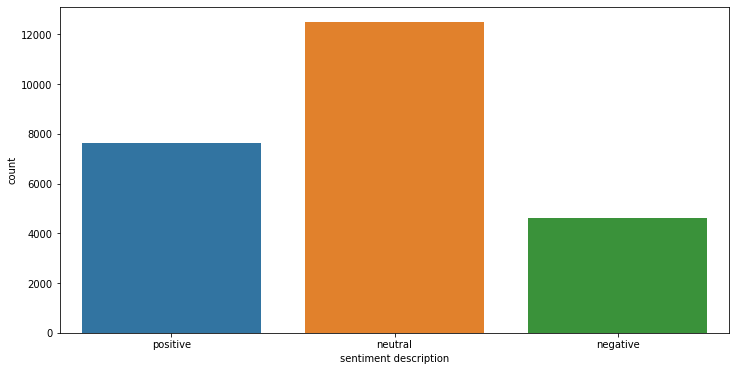

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.countplot(x='sentiment description',data=data)

In [80]:
data_positive = data[data['sentiment']==0]
a = data_positive[data_positive['pos']==1]
a['tweet'].values

array(['i like', 'thank ️', 'nice'], dtype=object)

### from the value above. I found out that the tweet with 100% positive are not giving any information.

<Axes: xlabel='pos', ylabel='count'>

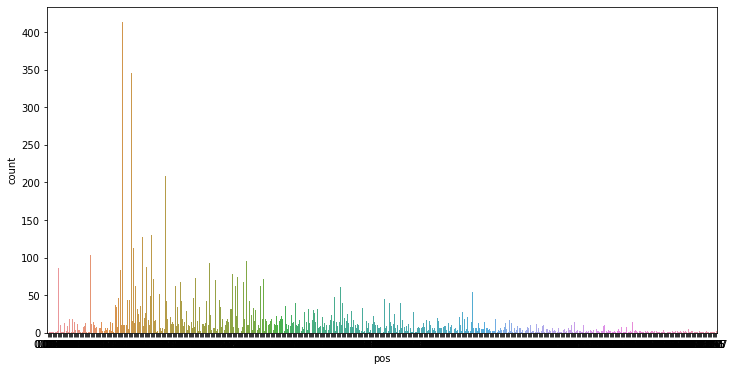

In [82]:
plt.figure(figsize=(12,6))
sns.countplot(x='pos',data=data_positive)

### From the diagram above, the count tweets decrease over the higher tweet positivity.

In [90]:
a = data_positive.groupby('pos').count()
a

,user,tweet,neg,neu,compound,sentiment,sentiment description
pos,,,,,,,
0.054,1,1,1,1,1,1,1
0.061,1,1,1,1,1,1,1
0.065,1,1,1,1,1,1,1
0.067,1,1,1,1,1,1,1
0.070,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...
0.855,1,1,1,1,1,1,1
0.857,1,1,1,1,1,1,1
0.867,1,1,1,1,1,1,1


In [91]:
max(a['user'])

413

In [92]:
b = a[a['user']==413]
b

# most of positive tweets contains 13% positive value.

,user,tweet,neg,neu,compound,sentiment,sentiment description
pos,,,,,,,
0.137,413,413,413,413,413,413,413


In [97]:
a = data_positive[data_positive['pos']==0.137]
data_13pos_head = a.head(10)
data_13pos_head['tweet'].values

# as I can see there is repeated tweet. Need to do clean up more. 

array(['rt fadzmel have suddenly become umno veteran hope dialektika tv correct posts people run away struggle soon possible',
       'rt fadzmel have suddenly become umno veteran hope dialektika tv correct posts people run away struggle soon possible',
       'rt cashisnotking1 visited expm worked old man ’ live long… need get consent v…',
       'rt fadzmel have suddenly become umno veteran hope dialektika tv correct posts people run away struggle soon possible',
       'rt fadzmel have suddenly become umno veteran hope dialektika tv correct posts people run away struggle soon possible',
       'rt hermyrahim yes fahmi fadzil pkr asked ds anwar one asked ds najib razak umno she exco princess…',
       'do remember elon musk tech giant company modern digital era wants shake handsdeal people like httpstcoody77jclu9',
       'rt ahmadmaslan my letter sua umno rosdepartment registration malaysian organizations putrajaya i prepared penasih',
       'rt ahmadmaslan my letter sua umno rosde

In [84]:
from statistics import *
mean(data_positive['pos'])

0.24743910130074892

In [85]:
max(data_positive['pos'])

1.0